In [2]:
# Import libraies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv file and create a data frame (df):
# Import a 311 NYC service request.
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [4]:
# shape of the dataframe:
df.shape

(300698, 53)

In [5]:
# size of df:
df.size

15936994

In [6]:
# Get information about the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
# Check null values:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
# First five rows of the dataframe:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
# Data type of created date & closed date:
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

object
object


In [10]:
# Let's convert this object data type to Datetime data type:
date_columns=['Created Date','Closed Date']
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False, parse_dates=date_columns,infer_datetime_format=True)

In [11]:
# data type is changed to date time format
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

datetime64[ns]
datetime64[ns]


In [12]:
# Create a new column 'Request_Closing_Time':
df['Request_Closing_Time']=df['Created Date'] - df['Closed Date']

In [13]:
df.head(2) # New column in now added to the dataframe

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",-1 days +23:04:45
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",-1 days +22:33:44


In [14]:
# Copy df into new dataframe for further permanent changes:
df1=df.copy()

In [15]:
# drop duplicates:
df1.drop_duplicates(inplace=True)

In [16]:
# drop empty and unspecified field columns from the dataframe:
df1.drop(columns=['Park Facility Name','School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],inplace=True)

In [17]:
# Chcek how number of columns are now present in the data frame:  we dropped 22 columns. (54-22 = 32)
df1.columns.nunique()

32

In [18]:
# Change the column position of 'Request_Closing_Time' :
new_pos=df1.pop('Request_Closing_Time')

In [19]:
# Place this column after closed date column:
df1.insert(3,'Request_Closing_Time',new_pos)
df1.head(3)

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,-1 days +23:04:45,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,-1 days +22:33:44,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,-1 days +19:08:29,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [20]:
# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations:
df2=df1.groupby(['Complaint Type','Location Type']).agg({'Request_Closing_Time':'mean'}).sort_values('Request_Closing_Time',ascending=True)

In [21]:
df2

,,Request_Closing_Time
Complaint Type,Location Type,
Animal in a Park,Park,-15 days +23:09:55
Derelict Vehicle,Roadway Tunnel,-1 days +06:02:09
Graffiti,Street/Sidewalk,-1 days +11:57:44.920000
Derelict Vehicle,Highway,-1 days +15:48:15.461538462
Urinating in Public,Club/Bar/Restaurant,-1 days +16:04:48
...,...,...
Posting Advertisement,Street/Sidewalk,-1 days +22:10:51.624137932
Panhandling,Park/Playground,-1 days +22:46:52.833333334
Urinating in Public,Subway Station,-1 days +22:50:52.333333334


In [22]:
# Provide major insights/patterns that you can offer in a visual format (graphs or tables)
# At least 4 major conclusions that you can come up with after generic data mining.

## Plot-1: 
- A bar plot between complaint types & no. of times complaint registered with "linear" scale:

In [23]:
no_of_times_complaint_registered=df1['Complaint Type'].value_counts()
no_of_times_complaint_registered

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [69]:
df_no_time=no_of_times_complaint_registered.to_frame()
df_no_time

,Complaint Type
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [74]:
df_no_time.index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Noise - Park',
       'Vending', 'Drinking', 'Noise - House of Worship',
       'Posting Advertisement', 'Urinating in Public',
       'Bike/Roller/Skate Chronic', 'Panhandling', 'Disorderly Youth',
       'Illegal Fireworks', 'Graffiti', 'Agency Issues', 'Squeegee',
       'Ferry Complaint', 'Animal in a Park'],
      dtype='object')

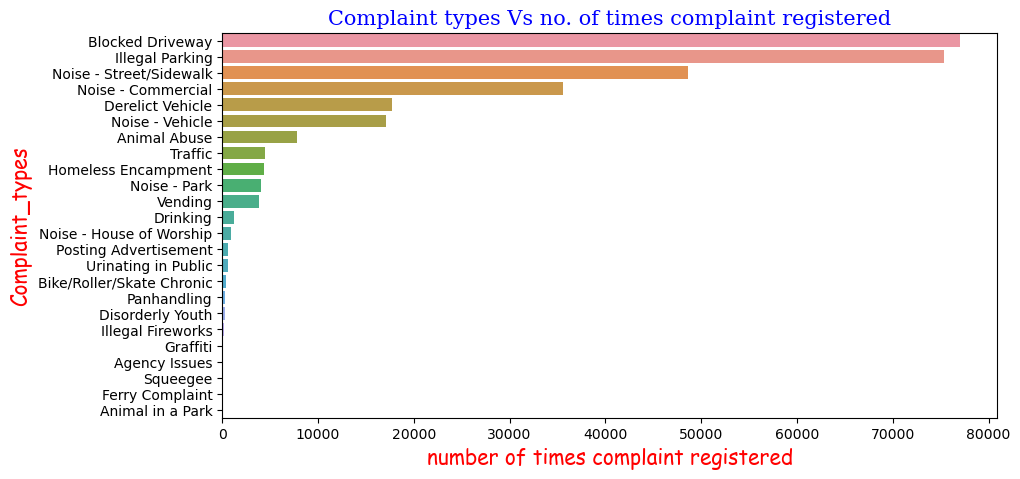

In [73]:
plt.subplots(figsize=(10,5))
sns.barplot(x = df_no_time['Complaint Type'] , y = df_no_time.index, data=df1)
font1={'family':'Cursive', 'color':"r",'size':15}
font2={'family':'serif','color':"b",'size':15}

plt.xlabel('number of times complaint registered',fontdict=font1)
plt.ylabel('Complaint_types',fontdict=font1)
plt.title('Complaint types Vs no. of times complaint registered',fontdict=font2)
plt.show()

### Conclusions from plot-1:
- In the above plot we have the number of times complaint registered for each complaint_type.
- But beacuse of the linear scale we are not able to see clearly any bar for the complaint type below "Posting-Advertisement" on y-axis.
- So we need to go for "logarithmic" scale on x-axis to see those bottom bars clearly and readable as shown below:

## Plot-2: 
- A barplot between complaint types & no. of times complaint registered with "log" scale :

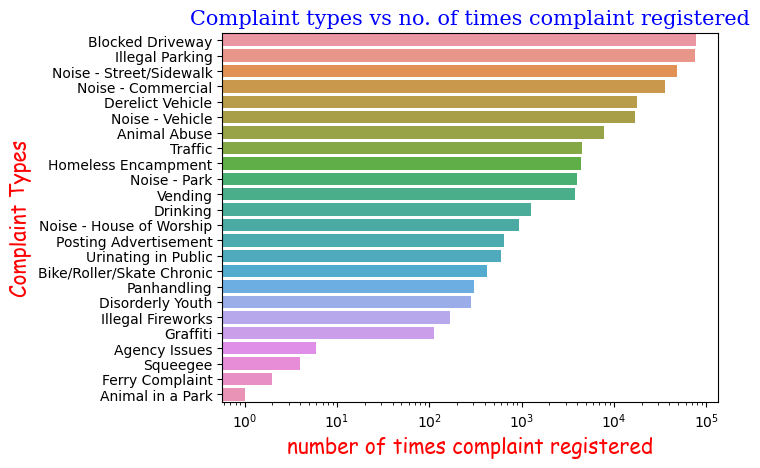

In [75]:
a=sns.barplot(x = df_no_time['Complaint Type'], y = df_no_time.index, data=df1)
a.set_xscale('log')

font1={'family':'Cursive', 'color':"r",'size':15}
font2={'family':'serif','color':"b",'size':20}

plt.xlabel('number of times complaint registered',fontdict=font1)
plt.ylabel('Complaint Types', fontdict=font1)
plt.title('Complaint types vs no. of times complaint registered',fontsize=15, fontdict=font2)
plt.show()

### Conclusions from plot-2:
- Now we can properly read the entire data and their corresponding bars too. 
- The bars from "Posting-Advertisement" to "Animals in a Park" are also clearly visible as compared to plot-1
- Complaints for Animal in a Park registered for lowest number of times while complaints for Blocked Driveway are highest.

## Plot-3 : 
- A pie plot for those complaint_types which are registered for more than 10000 times:

In [79]:
df_no_time.head(10)

,Complaint Type
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [58]:
new_df=df_no_time[df_no_time['Complaint Type']>10000]
new_df

,Complaint Type
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083


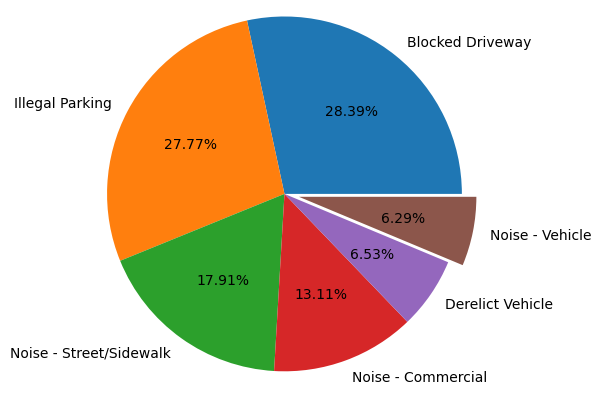

In [81]:
plt.pie(new_df['Complaint Type'],labels=new_df.index,autopct='%.2f%%',radius=1.2,explode=[0,0,0,0,0,0.1]);

### Conclusions from plot-3:
- This plot help us to know the percentage distribution of : no of times complaint registered for each complaint type.
- Blocked Driveway complaint covers the maximum portion of the pie plot which signifies that this complaint registered for highest number of times. Then illegal parking then noise-street/sidewalk and so on.
- All these complaints are registered more than 100000 times.

## Plot-4:
- A countplot for top 5 cities where maximum complaints are registered

In [116]:
top_5_cities=df1.groupby('City').agg({'Complaint Type':'count'}).sort_values('Complaint Type',ascending=False).head()
top_5_cities

,Complaint Type
City,
BROOKLYN,98307
NEW YORK,65994
BRONX,40702
STATEN ISLAND,12343
JAMAICA,7296


In [113]:
# df1.groupby('City')['Complaint Type'].value_counts().head(20) <--- This code is just for verification of above data:

# It generates count of each complaint type for each city. 
# When we sum up all those counts (of each complaint type) for every city, we will get above data.

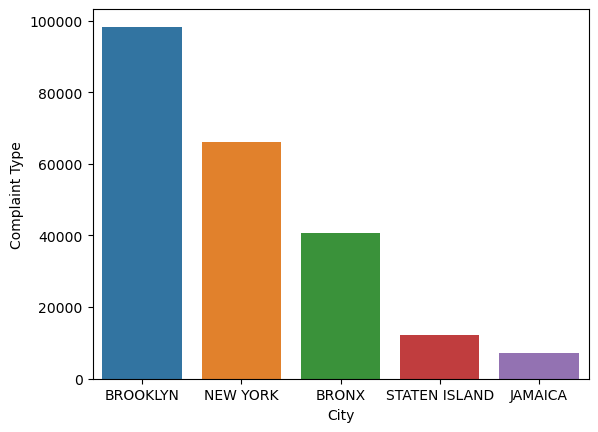

In [121]:
sns.barplot(x=top_5_cities.index, y = top_5_cities['Complaint Type'] , data=df1);

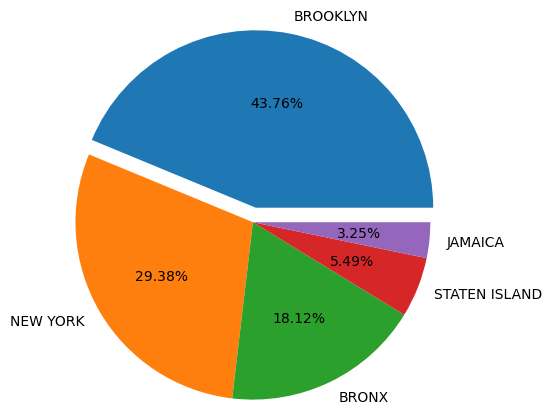

In [124]:
plt.pie(top_5_cities['Complaint Type'], labels = top_5_cities.index,autopct='%.2f%%',radius=1.2,explode=[0.1,0,0,0,0]);